# Linear Regression with multiple variables

Welcome to your second lab! You will build more advanced linear regression algorithm capable of handling any amount of features.

You will be predicting house prices given Boston house prices dataset.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Dataset ##

**Problem Statement**: You are given a dataset  containing:
    - a training set of m_train examples
    - a test set of m_test examples
    - each example is of shape (number of features, 1)


Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)





<b>Let's get more familiar with the dataset. Load the data by running the following code.</b>


In [2]:
# Loading the data

def load_data():
    from sklearn.datasets import load_boston
    from sklearn.model_selection import train_test_split
    
    boston = load_boston()
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(boston.data, boston.target, test_size=0.33, random_state=42)

    train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    
    return train_set_x.T, train_set_y, test_set_x.T, test_set_y, boston

train_set_x, train_set_y, test_set_x, test_set_y, visualization_set = load_data()

In [3]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(13, 339) (1, 339) (13, 167) (1, 167)


Many software bugs in machine learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
Remember that `train_set_x` is a numpy-array of shape (number of features, number of examples). For instance, you can access `m_train` by writing `train_set_x.shape[1]`.

In [4]:
### START CODE HERE ### (≈ 2 lines of code)
m_train = train_set_x.shape[1]
m_test = test_set_x.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

print ("\ntrain_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 339
Number of testing examples: m_test = 167

train_set_x shape: (13, 339)
train_set_y shape: (1, 339)
test_set_x shape: (13, 167)
test_set_y shape: (1, 167)


**Expected Output for m_train, m_test**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 339 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 167 </td> 
  </tr>
</table>


### Data visualization

Let's plot a histogram of the quantity we want to predict: namely, the house `price`.

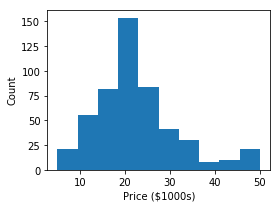

In [5]:
plt.figure(figsize=(4, 3))
plt.hist(visualization_set.target)
plt.xlabel("Price ($1000s)")
plt.ylabel("Count")
plt.tight_layout()

And it is very useful to understand the join histogram for each feature

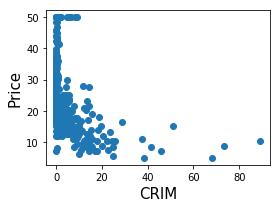

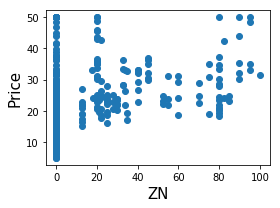

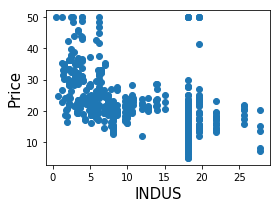

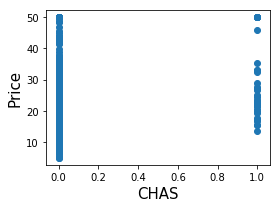

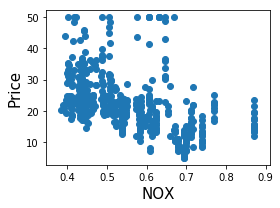

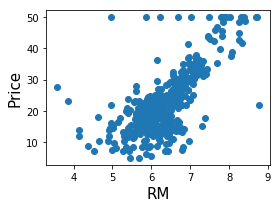

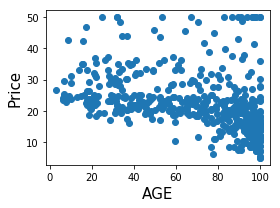

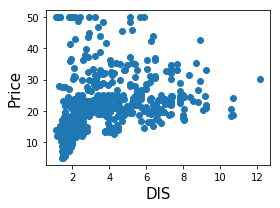

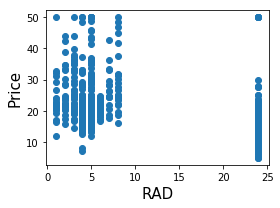

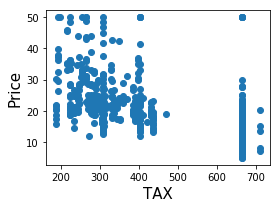

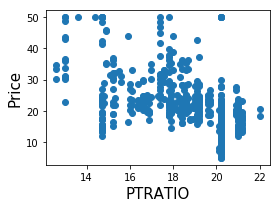

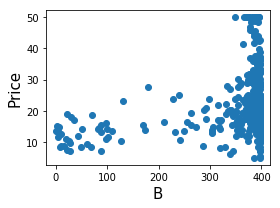

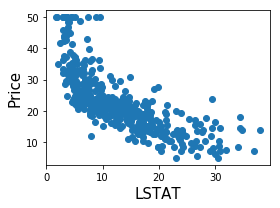

In [6]:
for index, feature_name in enumerate(visualization_set.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(visualization_set.data[:, index], visualization_set.target)
    plt.ylabel("Price", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

### Standardization
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.

$$X_{new} = \frac{X - \mu}{\sigma}$$

Let's standardize our dataset.

In [7]:
all_set_x = np.concatenate([train_set_x, test_set_x], axis=1)

mean = all_set_x.mean(axis=1, keepdims=True)
std = all_set_x.std(axis=1, keepdims=True)

train_set_x = (train_set_x - mean) / std
test_set_x = (test_set_x - mean) / std

## 3 - General Architecture of the learning algorithm ##

**Mathematical expression of the algorithm**:


For one example $x^{(i)}$:
$$h^{(i)} =  w^T x^{(i)} + b \tag{1}$$

The cost is then computed by summing squared diff over all training examples:
$$J = \frac{1}{2m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})^{2}\tag{2}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and derive a conclusion

## 4 - Building the parts of our algorithm ## 

The main steps for building a learning algorithm:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize `w` as a vector of zeros. If you don't know what numpy function to use, look up `np.zeros()` in the Numpy library's documentation.

In [8]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [9]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

### 4.2 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $H = (w^T X + b) = (h^{(1)}, h^{(2)}, ..., h^{(m-1)}, h^{(m)})$
- You calculate the cost function: $J = \frac{1}{2m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})^{2}$


Here is the formula of gradient of the cost function: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(H-Y)^T\tag{3}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h^{(i)}-y^{(i)})\tag{4}$$


In [10]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- results of shape (1, number of examples)
    
    Return:
    cost -- cost function for linear regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation.
    - Use np.dot() to avoid for-loops in favor of code vectorization
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    H = np.dot(w.T, X) + b    # compute activate
    cost = np.sum((H - Y) ** 2) / (2 * m) # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = np.dot(X, (H - Y).T) / m
    db = np.sum(H - Y) / m
    ### END CODE HERE ###
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [11]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[12.8       ]
 [30.82666667]]
db = 4.533333333333333
cost = 41.49333333333333


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 12.8]
     [ 30.82666667]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 4.533333333333333 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 41.49333333333333 </td>
    </tr>

</table>

### 4.3 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } \partial\theta$, where $\alpha$ is the learning rate.

In [12]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- results of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1 line of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [13]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.04675219]
 [-0.12676061]]
b = 1.223758731602527
dw = [[ 0.12274692]
 [-0.09406359]]
db = 0.3683397115660049


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[-0.04675219]
 [-0.12676061]] </td>
    </tr>
    
    <tr>
       <td> **b** </td>
       <td> 1.223758731602527 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.12274692]
 [-0.09406359]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.36833971156600487 </td>
    </tr>

</table>

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is only one step to computing predictions:

Calculate $H = w^T X + b$

In [14]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    """
    Predict using learned linear regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    
    Returns:
    H -- a numpy array (vector) containing all predictions for the examples in X
    """
    
    m = X.shape[1]
    
    # Compute vector "H"
    ### START CODE HERE ### (≈ 1 line of code)
    H = np.dot(w.T, X) + b
    ### END CODE HERE ###
    
    assert(H.shape == (1, m))
    
    return H

In [15]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 0.0897392   0.03843181 -0.6367585 ]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 0.0897392   0.03843181 -0.6367585]]
         </td>  
   </tr>

</table>


<font color='green'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the value for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [16]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=3000, learning_rate=0.5, print_cost=False):
    """
    Builds the linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of features, m_train)
    Y_train -- training values represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (number of features, m_test)
    Y_test -- test values represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print ("Train RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_train - Y_train) ** 2))))
    print ("Test RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_test - Y_test) ** 2))))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [17]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=3000, learning_rate=0.05, print_cost=True)

Cost after iteration 0: 307.900929
Cost after iteration 100: 11.792766
Cost after iteration 200: 11.584607
Cost after iteration 300: 11.532005
Cost after iteration 400: 11.511520
Cost after iteration 500: 11.501922
Cost after iteration 600: 11.497071
Cost after iteration 700: 11.494549
Cost after iteration 800: 11.493225
Cost after iteration 900: 11.492527
Cost after iteration 1000: 11.492159
Cost after iteration 1100: 11.491964
Cost after iteration 1200: 11.491862
Cost after iteration 1300: 11.491808
Cost after iteration 1400: 11.491779
Cost after iteration 1500: 11.491764
Cost after iteration 1600: 11.491756
Cost after iteration 1700: 11.491752
Cost after iteration 1800: 11.491749
Cost after iteration 1900: 11.491748
Cost after iteration 2000: 11.491748
Cost after iteration 2100: 11.491747
Cost after iteration 2200: 11.491747
Cost after iteration 2300: 11.491747
Cost after iteration 2400: 11.491747
Cost after iteration 2500: 11.491747
Cost after iteration 2600: 11.491747
Cost after i

**Expected Output**: 

<table style="width:40%"> 
    <tr>
        <td> **Cost after iteration 0 **  </td> 
        <td> 307.900929 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train RMSE**  </td> 
        <td> 4.7941103172540895 </td>
    </tr>
    <tr>
        <td>**Test RMSE** </td> 
        <td> 4.5549106456768715 </td>
    </tr>
</table> 

### Predicted vs True visualization 

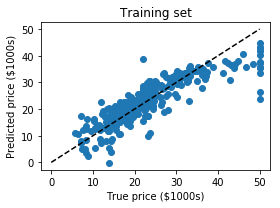

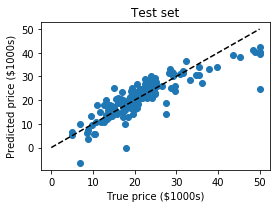

In [18]:
# Training set
plt.figure(figsize=(4, 3))
plt.title("Training set")
plt.scatter(train_set_y, d["Y_prediction_train"])
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")
plt.tight_layout()

# Test set
plt.figure(figsize=(4, 3))
plt.title("Test set")
plt.scatter(test_set_y, d["Y_prediction_test"])
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")
plt.tight_layout()

**Interpretation**:
You can see that in fact there is nice linear dependecy between predicted and true values.